In [1]:
! pip install -qqq langchain-nomic langchain langchain_community langchain-core

In [2]:
! pip install "nomic[local]"

  Using cached gpt4all-2.7.0-py3-none-manylinux1_x86_64.whl.metadata (4.7 kB)
Using cached gpt4all-2.7.0-py3-none-manylinux1_x86_64.whl (29.8 MB)


In [20]:
! pip install -qqq llama-index-embeddings-langchain

In [21]:
! pip install -qqq llama-index

In [25]:
! pip install sentence-transformers

  Using cached sentence_transformers-3.0.1-py3-none-any.whl.metadata (10 kB)
  Using cached transformers-4.42.4-py3-none-any.whl.metadata (43 kB)
  Using cached torch-2.3.1-cp312-cp312-manylinux1_x86_64.whl.metadata (26 kB)
  Using cached scikit_learn-1.5.1-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (12 kB)
  Using cached scipy-1.14.0-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 k

In [ ]:
! pip install --upgrade langchain

In [4]:
! pip install -U -qqq langchain-nomic langchain_community tiktoken langchainhub chromadb langchain langgraph tavily-python langchain-text-splitters

In [5]:
! pip install jupyter

  Using cached jupyter-1.0.0-py2.py3-none-any.whl.metadata (995 bytes)
  Using cached notebook-7.2.1-py3-none-any.whl.metadata (10 kB)
  Using cached qtconsole-5.5.2-py3-none-any.whl.metadata (5.1 kB)
  Using cached jupyter_console-6.6.3-py3-none-any.whl.metadata (5.8 kB)
  Using cached nbconvert-7.16.4-py3-none-any.whl.metadata (8.5 kB)
  Using cached ipywidgets-8.1.3-py3-none-any.whl.metadata (2.4 kB)
  Using cached widgetsnbextension-4.0.11-py3-none-any.whl.metadata (1.6 kB)
  Using cached jupyterlab_widgets-3.0.11-py3-none-any.whl.metadata (4.1 kB)
  Using cached beautifulsoup4-4.12.3-py3-none-any.whl.metadata (3.8 kB)
  Using cached bleach-6.1.0-py3-none-any.whl.metadata (30 kB)
  Using cached defusedxml-0.7.1-py2.py3-none-any.whl.metadata (32 kB)
  Using cached jupyterlab_pygments-0.3.0-py3-none-any.whl.metadata (4.4 kB)
  Using cached mistune-3.0.2-py3-none-any.whl.metadata (1.7 kB)
  Using cached nbclient-0.10.0-py3-none-any.whl.metadata (7.8 kB)
  Using cached nbformat-5.10.4-

In [ ]:
# ! curl -fsSL https://ollama.com/install.sh | sh

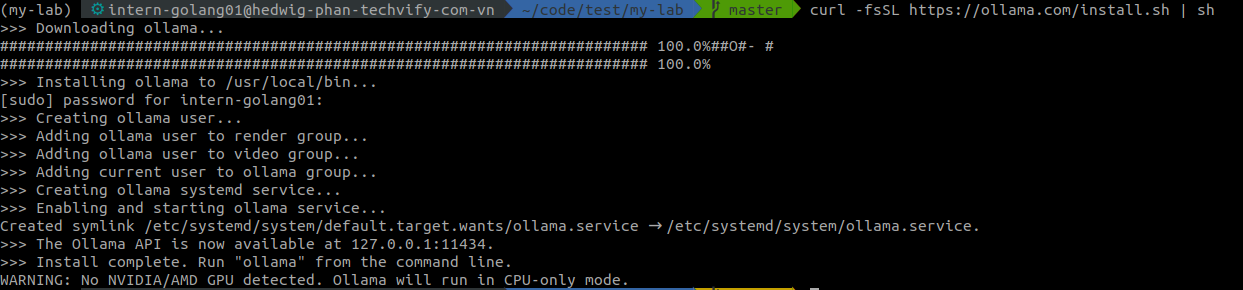

In [68]:
### LLM

local_llm = "llama3:latest"

In [11]:
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import Chroma
from langchain_nomic.embeddings import NomicEmbeddings
from langchain_text_splitters import RecursiveCharacterTextSplitter

In [12]:
urls = [
    "https://lilianweng.github.io/posts/2023-06-23-agent/",
    "https://lilianweng.github.io/posts/2023-03-15-prompt-engineering/",
    "https://lilianweng.github.io/posts/2023-10-25-adv-attack-llm/",
]

### Document

In [13]:
docs = [WebBaseLoader(url).load() for url in urls]
docs_list = [item for sublist in docs for item in sublist]

In [14]:
docs[0][0]

Document(metadata={'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/', 'title': "LLM Powered Autonomous Agents | Lil'Log", 'description': 'Building agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The potentiality of LLM extends beyond generating well-written copies, stories, essays and programs; it can be framed as a powerful general problem solver.\nAgent System Overview In a LLM-powered autonomous agent system, LLM functions as the agent’s brain, complemented by several key components:', 'language': 'en'}, page_content='\n\n\n\n\n\nLLM Powered Autonomous Agents | Lil\'Log\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nLil\'Log\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nPosts\n\n\n\n\nArchive\n\n\n\n\nSearch\n\n\n\n\nTags\n\n\n\n\nFAQ\n\n\n\n\nemojisearch.app\n\n\n\n\n\n\n\n\n\n      LLM Powered Autono

In [15]:
type(docs_list[0])

langchain_core.documents.base.Document

In [16]:
text_splitter = RecursiveCharacterTextSplitter.from_tiktoken_encoder(
    chunk_size=250, chunk_overlap=0
)

In [17]:
doc_splits = text_splitter.split_documents(docs_list)

In [18]:
doc_splits

[Document(metadata={'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/', 'title': "LLM Powered Autonomous Agents | Lil'Log", 'description': 'Building agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The potentiality of LLM extends beyond generating well-written copies, stories, essays and programs; it can be framed as a powerful general problem solver.\nAgent System Overview In a LLM-powered autonomous agent system, LLM functions as the agent’s brain, complemented by several key components:', 'language': 'en'}, page_content="LLM Powered Autonomous Agents | Lil'Log\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nLil'Log\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nPosts\n\n\n\n\nArchive\n\n\n\n\nSearch\n\n\n\n\nTags\n\n\n\n\nFAQ\n\n\n\n\nemojisearch.app\n\n\n\n\n\n\n\n\n\n      LLM Powered Autonomous Agents\n

## Embedding

In [26]:
from langchain.embeddings import HuggingFaceEmbeddings
from llama_index.embeddings.langchain import LangchainEmbedding

lc_embed_model = HuggingFaceEmbeddings(
    model_name="sentence-transformers/all-mpnet-base-v2"
)
embed_model = LangchainEmbedding(lc_embed_model)

/home/intern-golang01/anaconda3/envs/my-lab/lib/python3.12/site-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [27]:
type(lc_embed_model)

langchain_community.embeddings.huggingface.HuggingFaceEmbeddings

## Add data to vector store

In [28]:
# Add to vectorDB
vectorstore = Chroma.from_documents(
    documents=doc_splits,
    collection_name="rag-chroma",
    embedding=lc_embed_model,
)
retriever = vectorstore.as_retriever()

In [29]:
retriever

VectorStoreRetriever(tags=['Chroma', 'HuggingFaceEmbeddings'], vectorstore=<langchain_community.vectorstores.chroma.Chroma object at 0x7f7bf0bb3350>)

## Model

In [30]:
from langchain_community.chat_models import ChatOllama
from langchain_core.output_parsers import JsonOutputParser
from langchain_core.prompts import PromptTemplate

In [70]:
llm = ChatOllama(model=local_llm, temperature=0)

In [34]:
prompt = PromptTemplate(
    template="""<|begin_of_text|><|start_header_id|>system<|end_header_id|> You are a grader assessing relevance 
    of a retrieved document to a user question. If the document contains keywords related to the user question, 
    grade it as relevant. It does not need to be a stringent test. The goal is to filter out erroneous retrievals. \n
    Give a binary score 'yes' or 'no' score to indicate whether the document is relevant to the question. \n
    Provide the binary score as a JSON with a single key 'score' and no premable or explanation.
     <|eot_id|><|start_header_id|>user<|end_header_id|>
    Here is the retrieved document: \n\n {document} \n\n
    Here is the user question: {question} \n <|eot_id|><|start_header_id|>assistant<|end_header_id|>
    """,
    input_variables=["question", "document"],
)
retrieval_grader = prompt | llm | JsonOutputParser()

In [61]:
question = "Xin chàoo"
docs = retriever.invoke(question)
doc_txt = docs[1].page_content
print(retrieval_grader.invoke({"question": question, "document": doc_txt}))

{'score': 'no'}


In [62]:
from langchain_core.prompts import ChatPromptTemplate
prompt = ChatPromptTemplate.from_messages([
    ("system", "You are a world class technical documentation writer."),
    ("user", "{input}")
])
chain = prompt | llm 

In [63]:
chain.invoke({"input": "how can langsmith help with testing?"})

AIMessage(content='{ }', response_metadata={'model': 'llama3', 'created_at': '2024-07-23T08:25:17.381190224Z', 'message': {'role': 'assistant', 'content': ''}, 'done_reason': 'stop', 'done': True, 'total_duration': 4849440520, 'load_duration': 23208567, 'prompt_eval_count': 32, 'prompt_eval_duration': 4167595000, 'eval_count': 3, 'eval_duration': 615315000}, id='run-df99b33b-be25-4ea0-9598-a39cd7da81fe-0')

In [64]:
from langchain_core.output_parsers import StrOutputParser

output_parser = StrOutputParser()
chain = prompt | llm | output_parser

In [65]:
chain.invoke({"input": "how can langsmith help with testing?"})

'{ }'

In [71]:
from langchain.chains.combine_documents import create_stuff_documents_chain

prompt = ChatPromptTemplate.from_template("""Answer the following question based only on the provided context:

<context>
{context}
</context>

Question: {input}""")

document_chain = create_stuff_documents_chain(llm, prompt)

In [72]:
from langchain_core.documents import Document

document_chain.invoke({
    "input": "how can langsmith help with testing?",
    "context": [Document(page_content="langsmith can let you visualize test results")]
})

'According to the provided context, Langsmith can help with testing by allowing you to "visualize test results".'